In [1]:
%%html
<style>h1, h2, h3, h4 {font-weight: normal !important}</style>

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
if Path("/kaggle/input").exists():
    dataset_path = Path("/kaggle/input")
    result_path = Path("/kaggle/output")
else:
    dataset_path = Path("./dataset/")
    Path("./results/").mkdir(exist_ok=True)
    result_path = Path("./results/")
    models_path = result_path/"models"

In [4]:
[x.name for x in list(dataset_path.iterdir())]

['train.csv', 'test.csv', 'sample_submission.csv']

# Data load

In [8]:
train_df = pd.read_csv(dataset_path/"train.csv", parse_dates=["date"])
test_df = pd.read_csv(dataset_path/"test.csv", parse_dates=["date"])
sample_subm_df = pd.read_csv(dataset_path/"sample_submission.csv")

train_df.shape, test_df.shape, train_df.dtypes

((70128, 6),
 (17520, 5),
 row_id               int64
 date        datetime64[ns]
 country             object
 store               object
 product             object
 num_sold             int64
 dtype: object)

In [9]:
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [10]:
test_df.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


# variable study

## Null value check

In [19]:
print(f"num of nulls in train set: {train_df.isnull().sum().sum()}")
print(f"num of nulls in test set: {test_df.isnull().sum().sum()}")

num of nulls in train set: 0
num of nulls in test set: 0


## Country

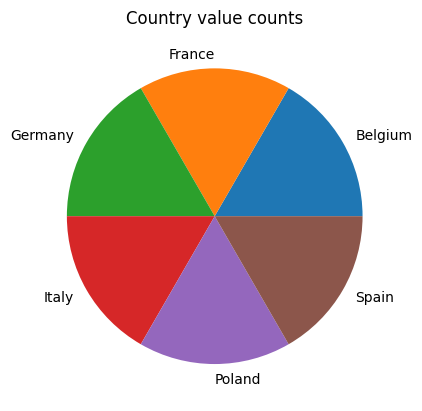

In [17]:
train_df.country.value_counts().plot(kind="pie", title="Country value counts", ylabel="")
plt.show()

## Store

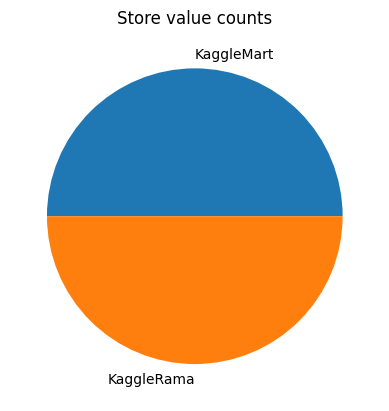

In [21]:
train_df.store.value_counts().plot(kind="pie", title="Store value counts", ylabel="")
plt.show()

## Product

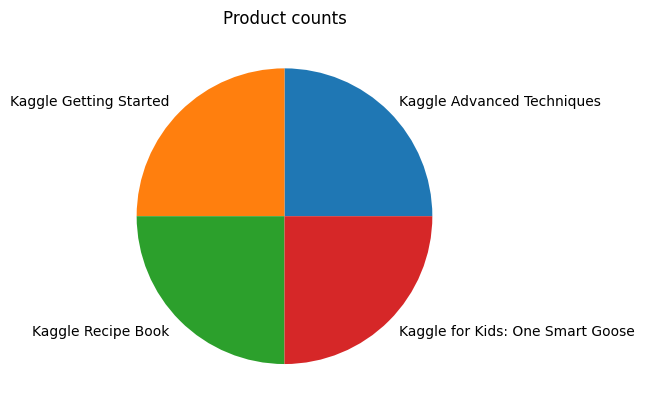

In [24]:
train_df["product"].value_counts().plot(kind="pie", title="Product counts", ylabel="")
plt.show()

## date

In [23]:
train_df.date.

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
70123    2020-12-31
70124    2020-12-31
70125    2020-12-31
70126    2020-12-31
70127    2020-12-31
Name: date, Length: 70128, dtype: object

In [22]:
train_df.date.value_counts()

2017-01-01    48
2019-09-10    48
2019-09-08    48
2019-09-07    48
2019-09-06    48
              ..
2018-05-01    48
2018-04-30    48
2018-04-29    48
2018-04-28    48
2020-12-31    48
Name: date, Length: 1461, dtype: int64